# Imports

In [0]:
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
import math, random
import numpy as np
import sys
import os
from tqdm import tqdm

#Load Corpus


In [0]:
drive.mount('/drive')
os.system('unzip /drive/Mydrive/ORLProcessed.zip')

def readpgm(name):
    with open(name) as f:
        lines = f.readlines()

    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    assert lines[0].strip() == 'P2' 

    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

def get_images(folder, comment):
  X = []
  y = []
  for l in tqdm(range(1,41), desc=comment):
    path = folder + '/s' + str(l)
    for i in os.listdir(path):
      image = readpgm(path+'/'+i)
      if image != None:
        X.append(np.reshape(image[0],image[1]))
        y.append(str(l))
  X = np.array(X)
  y = np.array(y)
  return X,y

x_train, y_train = get_images('/drive/My Drive/ORLProcessed/Train', 'Train corpus')
x_test, y_test = get_images('/drive/My Drive/ORLProcessed/Test', 'Test corpus')

print('')
print('To train: ')
print(x_train.shape)
print(y_train.shape)


print('To test: ')
print(x_test.shape)
print(y_test.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


Train corpus:   0%|          | 0/40 [00:00<?, ?it/s]

Mounted at /drive


Test corpus: 100%|██████████| 40/40 [02:53<00:00,  4.33s/it]


To train: 
(200, 112, 92)
(200,)
To test: 
(200, 112, 92)
(200,)


# Show me a random picture

[[34 38 36 ... 46 45 46]
 [33 37 38 ... 46 46 47]
 [34 37 42 ... 46 48 48]
 ...
 [36 36 37 ... 56 57 53]
 [38 39 36 ... 57 63 55]
 [34 35 33 ... 55 58 55]]


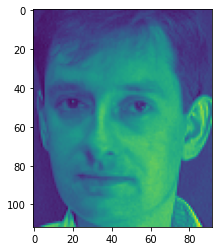

In [0]:
rand_im = x_train[random.randint(0,len(x_train)-1)]
plt.imshow(rand_im)
print(rand_im)

# Matrix Transform

In [0]:
x_train = np.matrix([x.flatten() for x in x_train])
x_test = np.matrix([x.flatten() for x in x_test])
print(x_train.shape)
print(x_test.shape)

(200, 10304)
(200, 10304)


# PCA & Eigen Vectors calcs

In [0]:
def PCA(X):
  X = X.T

  mean = X.mean(axis=1)

  A = X - mean
  d = A.shape[0]
  n = A.shape[1]
  # print('Matriz A: ', A.shape)
  # print('d = ', d)
  # print('n = ', n)

  C = 1/float(d) * A.T * A
  
  # print('Matriz de covarianzas: ', C.shape)

  Delta_prime,B_prime = np.linalg.eigh(C)

  B = A * B_prime
  Delta = (float(d)/float(n)) * Delta_prime

  e_vectoresOrdered = sorted(list(enumerate(Delta)), key=lambda l:l[1] , reverse=True)

  B_res = []
  for i,d in e_vectoresOrdered:#e_vectoresOrdered es de la forma (indice, eigenvalue)
    B_res.append(B[:,i] / np.linalg.norm(B[:,i]))
  B_res = np.matrix(np.array(B_res)).T
  # print('Eigen Vectores Ordenados: ', B_res.shape)

  return B_res

# Reduction

In [0]:
def reduce(data, eigenvectores, components):
  data = data.T
  vectores = eigenvectores[:,:components]
  data = data - data.mean(axis=1)
  res = vectores.T * data
  res = res.T
  return res

# Loop of tries

In [0]:
best_accuracy = 0;
dimension_prime = 0;
evecs_train = PCA(x_train.copy())
x = []
y = []
for n in range(1,201):
  #Dimension reduction
  train_reduced = reduce(x_train.copy(), evecs_train.copy(), n)
  test_reduced = reduce(x_test.copy(), evecs_train.copy(), n)
  #1NN-Classifier
  neigh = KNeighborsClassifier(n_neighbors=1)
  #Train
  neigh.fit(train_reduced, y_train)
  #Test
  score = neigh.score(test_reduced, y_test)
  #Plot lists
  x.append(n)
  y.append(score)
  print('For n =', n, ', accuracy = ', score)
  if(score > best_accuracy):
    best_accuracy = score
    dimension_pca = n
print('##############################################################################################')
print('##############################################################################################')
print('Best Score = ', best_accuracy, ", at dimension in PCA = ", dimension_pca)
print('##############################################################################################')
print('##############################################################################################')

For n = 1 , accuracy =  0.14
For n = 2 , accuracy =  0.32
For n = 3 , accuracy =  0.53
For n = 4 , accuracy =  0.585
For n = 5 , accuracy =  0.67
For n = 6 , accuracy =  0.715
For n = 7 , accuracy =  0.77
For n = 8 , accuracy =  0.795
For n = 9 , accuracy =  0.84
For n = 10 , accuracy =  0.855
For n = 11 , accuracy =  0.835
For n = 12 , accuracy =  0.84
For n = 13 , accuracy =  0.845
For n = 14 , accuracy =  0.845
For n = 15 , accuracy =  0.85
For n = 16 , accuracy =  0.855
For n = 17 , accuracy =  0.865
For n = 18 , accuracy =  0.855
For n = 19 , accuracy =  0.855
For n = 20 , accuracy =  0.865
For n = 21 , accuracy =  0.87
For n = 22 , accuracy =  0.875
For n = 23 , accuracy =  0.875
For n = 24 , accuracy =  0.875
For n = 25 , accuracy =  0.875
For n = 26 , accuracy =  0.875
For n = 27 , accuracy =  0.875
For n = 28 , accuracy =  0.875
For n = 29 , accuracy =  0.875
For n = 30 , accuracy =  0.88
For n = 31 , accuracy =  0.88
For n = 32 , accuracy =  0.88
For n = 33 , accuracy =  0.88

# Plot Graphics

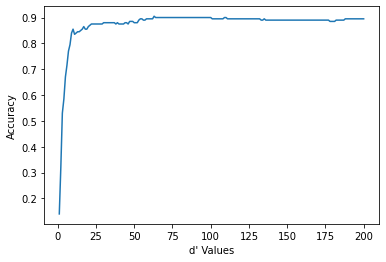

In [0]:
plt.xlabel('d\' Values')
plt.ylabel('Accuracy')
plt.plot(x, y)
plt.show()